In [128]:
from qiskit.visualization import array_to_latex
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [129]:
def read(ar):
    new = []
    for i in range(M):
        new.append(ar[i]+ar[i+M])
    return new

def timestep(ar):
    new = np.zeros(2*M)
    #link 1
    for i in range(M-2,-1,-1):
        new[i+1] = ar[i]
        
    new[0] = new[1]
    #link 2
    for i in range(M+1,2*M):
        new[i-1] = ar[i]
        
    new[2*M-1] = new[2*M-2]
    #boundaries
    return new

def splitState(ar):
    new = [0 for i in range(2*M)]
    for i in range(M):
        new[i] = ar[i]*x
        new[i+M] = ar[i]*y
    return new

def evolve(t, ar):
    for i in range(t):
        ar = splitState(read(timestep(ar)))
    return ar

In [130]:
#parameters

M = 64 # lattices

w1 = 0.5 ##diffusion
w2 = 0.5 ##diffusion
e1 = 1   ##right
e2 = -1  ##left
cs = 1   ##speed of sound
u = 0.2  ##advection 


x = w1*(1+e1*u/cs**2)
y = w2*(1+e2*u/cs**2)
print(x,y)

0.6 0.4


In [131]:
classicalState = [0.1 for i in range(M)]
classicalState[12] = 0.2
classicalState = classicalState/np.linalg.norm(classicalState) * 2**(-0.5)
# classicalState[13] = 0.1
# classicalState[14] = 0.1
# classicalState[15] = 0.1
# classicalState[16] = 0.1
# classicalState[17] = 0.1
# classicalState[18] = 0.1
# classicalState[19] = 0.1

classicalState = splitState(classicalState)

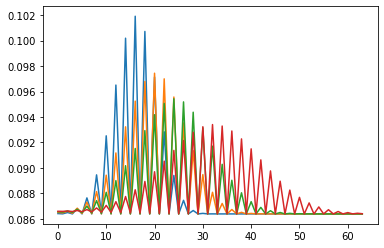

In [132]:
# plt.plot([i for i in range(0,M,1)], read(classicalState)[::1]);  
for i in range(1,101):
    classicalState = evolve(1, classicalState)
    if i%20 == 0 and i!=80:
        plt.plot([j for j in range(0,M,1)], read(classicalState)[::1]);
#         print(classicalState)

# analytical

In [79]:
def calc(pos,t):
    center = 12
    diff = pos-center
    c = .1/np.sqrt(4*np.pi*t*0.5) * np.exp(-(diff-0.2*t)**2/(4*t*0.5))
    return c
def createAr(t):
    new = []
    for i in range(64):
        new.append(calc(i,t))
    return new

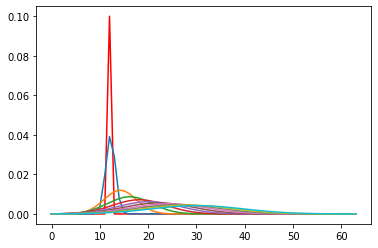

In [26]:
tmp = [0 for i in range(64)]
tmp[12] = 0.1
plt.plot([i for i in range(0,64)], tmp,"red");
for j in range(1,100,10):   
    plt.plot([i for i in range(0,64)], createAr(j));

In [27]:
#testing

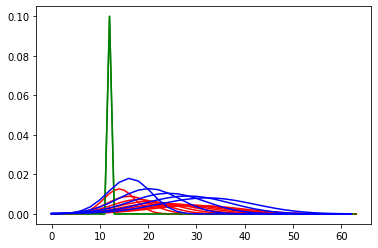

In [28]:
classicalState = [0 for i in range(M)]
classicalState[12] = 0.1
classicalState = splitState(classicalState)
#analytical
tmp = [0 for i in range(64)]
tmp[12] = 0.1
plt.plot([i for i in range(0,64)], tmp,"green");
for j in range(10,100,10):   
    plt.plot([i for i in range(0,64)], createAr(j),"red");
    
#lbm
plt.plot([i for i in range(0,M)], read(classicalState)[::1],"green");  
for i in range(5):
    classicalState = evolve(20, classicalState)
    plt.plot([j for j in range(0,M,2)], read(classicalState)[::2],"blue"); 